## **Import Libraries**
___
Import the necessary libraries 

In [1]:
# Import Analytical Libraries
import pandas as pd
import numpy as np 

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics Libraries
from scipy.stats import kurtosis, skew, shapiro
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# Modeling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Misc Libraries
from typing import Optional, Union

## **Read Files**
___

Read in the necessarry files, and set the dataframes to return all the the columns of the dataframe. Set the style of all the plots to be visualized.

In [2]:
# Read in the HR attrition csv file.
df = pd.read_csv('data/encoded_attrition.csv', index_col='Unnamed: 0')

# Return all columns when displaying dataframe.
pd.set_option('display.max_columns', None)

# Set the style of the plots
plt.style.use('ggplot')
# Set default colormap for continuous data (both Matplotlib and Seaborn)
plt.rcParams['image.cmap'] = 'rocket'
# Set default palette for categorical data
sns.set_palette('rocket')

## **Dataset Identification**
___
Identify the shape and size of the dataset along with its axes and datatypes for each feature to understand the overall structure of the dataset that has been read in. 

In [3]:
# Return the shape and size of the dataset
print(f'Shape of the dataset: {df.shape}\nSize of the dataset: {df.size}')

Shape of the dataset: (1470, 43)
Size of the dataset: 63210


In [4]:
# Return the axes of the dataset
df.axes

[Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
        ...
        1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469],
       dtype='int64', length=1470),
 Index(['Age', 'AgeBin', 'BusinessTravel', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'IncomeBin', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
        'Department_Research & Development', 'Department_Sales',
        'EducationField_Life Sciences', 'EducationField_Marketing',
        'EducationField_Medical', 'EducationField_Other',
        'EducationField_Technical Degree', 'Gender_Male',
        'JobRole_Human Resources', 'JobRole_Laborat

In [5]:
# Return the datatypes of each feature in the dataset
df.dtypes

Age                                  int64
AgeBin                               int64
BusinessTravel                       int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
IncomeBin                            int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Attrition_Y

In [6]:
# Reaturn the top 5 rows of the dataset
df.head()

,Age,AgeBin,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,IncomeBin,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,1,1,2,2,3,2,4,5993,1,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,2,2,8,1,3,2,2,2,5130,1,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1,2,2,4,2,1,3,2090,0,6,15,3,2,0,7,3,3,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1,2,3,4,4,3,1,3,2909,0,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,1,1,2,1,1,3,1,2,3468,1,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [7]:
# Return the bottom 5 rows of the dataset
df.tail()

,Age,AgeBin,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,IncomeBin,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1465,36,1,2,23,2,3,4,2,4,2571,0,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,1,1,6,1,4,2,3,1,9991,2,4,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,1,1,4,3,2,4,2,2,6142,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,2,2,2,3,4,2,2,2,5390,1,2,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1469,34,1,1,8,3,2,4,2,3,4404,1,2,12,3,1,0,6,3,4,4,3,1,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


## **Dataset Preprocessing**
___
Identify the shape and size of the dataset along with its axes and datatypes for each feature to understand the overall structure of the dataset that has been read in. 

##### 1. **Feature Distribution Statistics**
A look at the distribution of values within the features of the dataset. Look at the skew and the kurtosis values to determine whether the feature needs to be transformed to bring about a more gaussian distribution to the skewed feature using log transformation, before scaling of the feature. 

In [8]:
def statistics(dataframe: pd.DataFrame) -> None:
    """
    A function that outputs statistics for features with more than 12 unique values.
    The skew and Kurtosis values, along with the p-value from the Shapiro-Wilk test. These values help
    evaluate the distribution of the features of the dataframe passed in to the dataframe parameter. 

    Args: pandas.dataframe.
        - A pandas dataframe object.

    Returns: 
        None
    """
    for column in dataframe:
        if dataframe[column].nunique() > 5:
            _skew = skew(dataframe[column])
            _kurtosis = kurtosis(dataframe[column], fisher=True)
            print(
                f"\n{column}\n"
                f"skew: {_skew:.4f}\n"
                f"kurtosis: {_kurtosis:.4f}"
            )

            # Perform Shapiro-Wilk test
            stat, p_value = shapiro(dataframe[column])

            # Print the results
            print(f"Shapiro-Wilk test: {stat:.4f}")
            print(f"P-value: {p_value:.4f}")

            # Interpret the p-value
            alpha = 0.05
            if p_value > alpha:
                print("The data is likely normally distributed (fail to reject H0).")
            else:
                print("The data is not normally distributed (reject H0).")

            # Check the absolute values of each skew value of a feature
            if np.abs(_skew) < 0.5:
                print('distribution is almost symmetrical')
            elif 0.5 <= np.abs(_skew) <= 1:
                print('distribution is modertely skewed')
            else:
                print('distribution is highly skewed')
            
            # Extremity of tail distribution
            if _kurtosis > 0:
                print(
                    f'Leptokurtic distribution - heavier tails and a sharper peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with higher peakedness '
                    f'and a greater probability of extreme values.\n'
                )
            elif _kurtosis < 0:
                print(
                    f'Platykurtic distribution - lighter tails and a flatter peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with less peakedness ' 
                    f'and a lower probability of extreme values.\n'
                )
            else:
                print(
                    f'Mesokurtic distribution - similar peak and tail shape as the normal '
                    f'distribution.\n'
                    )
                

statistics(df)


Age
skew: 0.4129
kurtosis: -0.4069
Shapiro-Wilk test: 0.9774
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is almost symmetrical
Platykurtic distribution - lighter tails and a flatter peak than the normal distribution.
This type of distribution is often associated with less peakedness and a lower probability of extreme values.


DistanceFromHome
skew: 0.9571
kurtosis: -0.2281
Shapiro-Wilk test: 0.8616
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is modertely skewed
Platykurtic distribution - lighter tails and a flatter peak than the normal distribution.
This type of distribution is often associated with less peakedness and a lower probability of extreme values.


MonthlyIncome
skew: 1.3684
kurtosis: 0.9977
Shapiro-Wilk test: 0.8279
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This

**`DESCRIPTIVE ANALYSIS SUMMARY`**:
 
**Statistics**

| Feature | Skew | Null Hypothesis | Distribution Type | Transformation | Scale Method |
| ------- | ---- | --------------- | ----------------- | -------------- | ------------ |
| Age | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) |
| DistanceFromHome | Moderately Skew +ve | Reject | Platykurtic  | No | Normalization(MinMaxScaler) | 
| MonthlyIncome |highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| NumCompaniesWorked |highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| PercentSalaryHike | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) | 
| TotalWorkingYears | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| TrainingTimesLastYear | Moderately Skew +ve | Reject | Leptokurtic  | No | RobustScaler | 
| YearsAtCompany | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| YearsInCurrentRole | Moderately Skew +ve | Reject | Leptokurtic | No | RobustScaler | 
| YearsSinceLastPromotion | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| YearsWithCurrManager | Moderately Skew +ve | Reject | Leptokurtic | No | RobustScaler | 

#### 2. **Duplicated Values**
In the context of a dataframe, a record can be a duplicate of another record, if all the data values of each feature are identical. A record can also be considered a duplicate if the data values of a specified subset of features are identical. In this section, we look to identify and remove the duplicate values within the dataset.

In [9]:
# Return the total number of duplicate values in the dataset
dupes = df.duplicated().sum()
print(f'Total number of duplicates in the dataset: {dupes}')

Total number of duplicates in the dataset: 0


#### 3. **Null Values**

Null values are missing data values within a feature of record. These missing values need to be identified and either removed or imputed. 

In [10]:
# Return the total number of null values in the dataset
nulls = np.count_nonzero(df.isnull().values)
print(f'Total number of null values in the dataset: {nulls}')

Total number of null values in the dataset: 0


#### 4. **Outlier Values**
 An outlier is a data point that differs significantly from other observations in a dataset. Outliers can occur due to variability in the data or errors in measurement, and they can influence the results of statistical analyses and machine learning models. In this section, we look to identify all the outlier values inn each feature of the dataset.

In [11]:
def outlierIQR(column: str, dataframe: Optional[pd.DataFrame]=df) -> None:
    """
    A function that outputs features from the pandas.dataframe object passed in the dataframe 
    parameter that have outlier values, and the total number of outlier values in the feature. 
    The outliers are found using the IQR method. 

    Args:
        column: string.
            - Name of the column that can be found within the pandas.dataframe object passed in the dataframe
            parameter.
        dataframe: pandas.dataframe.
            - A pandas dataframe.

    Returns:
        None
    """
    # Store the quantile values 
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    # Return the interquartile range
    IQR = q3 - q1

    # Create the upper and lower limits 
    upper_limit = dataframe[column] > q3 + (IQR * 1.5)
    lower_limit = dataframe[column] < q1 - (IQR * 1.5)

    # Return the outliers of the feature
    outliers = dataframe[column][upper_limit | lower_limit]

    if len(outliers) > 0:
        print(f'{column}\nTotal Outliers: {len(outliers)}\n')


for feature in df:
    outlierIQR(feature)

BusinessTravel
Total Outliers: 427

MonthlyIncome
Total Outliers: 114

NumCompaniesWorked
Total Outliers: 52

PerformanceRating
Total Outliers: 226

StockOptionLevel
Total Outliers: 85

TotalWorkingYears
Total Outliers: 63

TrainingTimesLastYear
Total Outliers: 238

YearsAtCompany
Total Outliers: 104

YearsInCurrentRole
Total Outliers: 21

YearsSinceLastPromotion
Total Outliers: 107

YearsWithCurrManager
Total Outliers: 14

Attrition_Yes
Total Outliers: 237

EducationField_Marketing
Total Outliers: 159

EducationField_Other
Total Outliers: 82

EducationField_Technical Degree
Total Outliers: 132

JobRole_Human Resources
Total Outliers: 52

JobRole_Laboratory Technician
Total Outliers: 259

JobRole_Manager
Total Outliers: 102

JobRole_Manufacturing Director
Total Outliers: 145

JobRole_Research Director
Total Outliers: 80

JobRole_Research Scientist
Total Outliers: 292

JobRole_Sales Executive
Total Outliers: 326

JobRole_Sales Representative
Total Outliers: 83



#### 5. **Feature Scaling**

Feature scaling is a vital part of the preprocessing steps of a dataset because it brings all the features of the dataset into the same scale as to not give value preference to the features with larger values when feeding in the features to the model that will be trained. In this section, we will transform or scale, or scale the features based on the output information we received from the Features Distribution section.

In [12]:
def featureScaling(
        dataframe: pd.DataFrame, column: str, transform_features: list, skewed_features: list
) -> dict[str, np.ndarray]:
    """
    Applies different scaling or transformation techniques to a feature based on its characteristics.

    Args:
        - dataframe (pd.DataFrame): The DataFrame containing the features.
        - column (str): The name of the feature/column to scale or transform.
        - transform_features (list): List of feature names that need a log transformation 
        followed by robust scaling.
        - skewed_features (list): List of feature names that are skewed and require robust 
        scaling.

    Returns:
        - dict: A dictionary with the column name as the key and the scaled or transformed 
        feature values as the value.

    Raises:
    ValueError: If an incorrect column name is provided.
    """
    if column in transform_features:
        # Apply Log transformation
        transform = np.log1p(dataframe[[column]])

        # Instantiate the RobustScaler
        r_scaler = RobustScaler()
        # Fit and transform the feature
        transform_scale = r_scaler.fit_transform(transform)

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    elif column in skewed_features:
        # Instantiate the RobustScaler
        r_scaler = RobustScaler()

        # Fit the model with the feature
        transform_scale = r_scaler.fit_transform(dataframe[[column]])

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    elif column in dataframe.columns:
        # Instantiate MinMaxScaler
        scaler = MinMaxScaler()

        # Fit and transform using feature
        transform_scale = scaler.fit_transform(dataframe[[column]])

        # Store a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    else:
        raise ValueError(f"Incorrect column provided: {column}")

In [13]:
# Store the features to be transformed and scaled, and the features to be scaled using robust scalers
# because of the outliers in those features
transform_scale_features = ['NumCompaniesWorked', 'TotalWorkingYears',
                            'YearsAtCompany', 'YearsSinceLastPromotion', 'MonthlyIncome']
outlier_features = ['TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsWithCurrManager']

table_data = {}
for column in df:
    data = featureScaling(df, column, transform_scale_features, outlier_features)
    table_data.update(data)

scaled_df = pd.DataFrame(table_data)

## **Predictive Modeling**
___
Predictive analysis involves using statistical techniques and machine learning algorithms to analyze historical data and make informed predictions about future outcomes. Using the predictor features, we look to be able to predict the attrition status of employees, given the information we have.

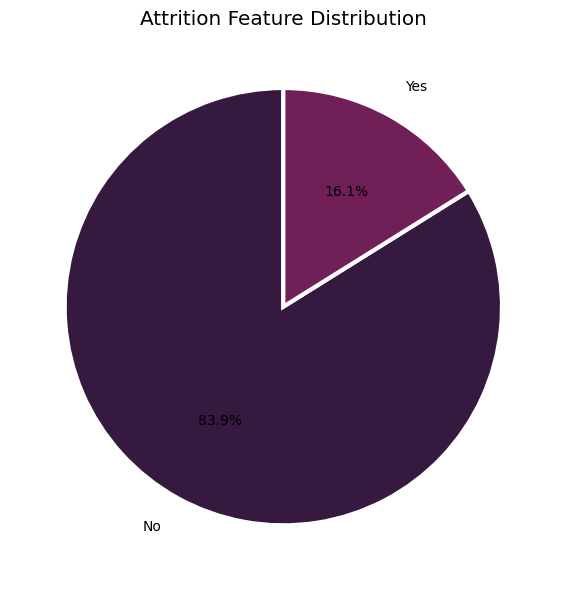

In [14]:
# Group the Attrition_Yes feature and find the count of each value. 
attrition_df = scaled_df.groupby('Attrition_Yes')[['Attrition_Yes']].count()

# Create the figure
plt.figure(figsize=(6, 6))

# Create a pieplot
plt.pie(
    x=attrition_df['Attrition_Yes'].values,
    labels=['No', 'Yes'],
    startangle=90,
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
plt.title('Attrition Feature Distribution')
plt.tight_layout()
plt.show()

### 1. **Splitting the data**
During this process, we split the data into our dependent and independent variables. Dependent variables are the features required to train the model in order to make the predictions, which will be compared to the dependent variable to evaluate the performance of our machine learning algorithm.

In [15]:
scaled_df.head()

,Age,AgeBin,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,IncomeBin,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.666667,0.5,0.000000,0.25,0.333333,0.666667,0.25,1.000000,0.186804,0.333333,1.198978,0.000000,0.0,0.000000,0.000000,-0.242743,-3.0,0.000000,0.168233,0.2,-0.500000,0.4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.666667,1.0,0.250000,0.00,0.666667,0.333333,0.25,0.333333,0.039730,0.333333,-0.442507,0.857143,1.0,1.000000,0.333333,0.000000,0.0,0.666667,0.661510,0.8,0.000000,0.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.333333,0.5,0.035714,0.25,1.000000,0.333333,0.00,0.666667,-0.809515,0.000000,0.924704,0.285714,0.0,0.333333,0.000000,-0.385221,0.0,0.666667,-1.955449,-0.6,-0.500000,-0.6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.333333,1.0,0.071429,0.75,1.000000,0.666667,0.00,0.666667,-0.496830,0.000000,-0.442507,0.000000,0.0,0.666667,0.000000,-0.242743,0.0,0.666667,0.442507,0.8,0.500000,-0.6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.333333,0.5,0.035714,0.00,0.000000,0.666667,0.00,0.333333,-0.330593,0.333333,1.313964,0.071429,0.0,1.000000,0.333333,-0.546748,0.0,0.666667,-0.756471,-0.2,0.292481,-0.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# Isolate the dependent and the independent variables
X = scaled_df.drop(columns='Attrition_Yes')
y = scaled_df['Attrition_Yes']

# Split the variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE resampling to imbalanced dataset
sr = ADASYN(random_state=42)
X_resampled, y_resampled = sr.fit_resample(X_train, y_train)

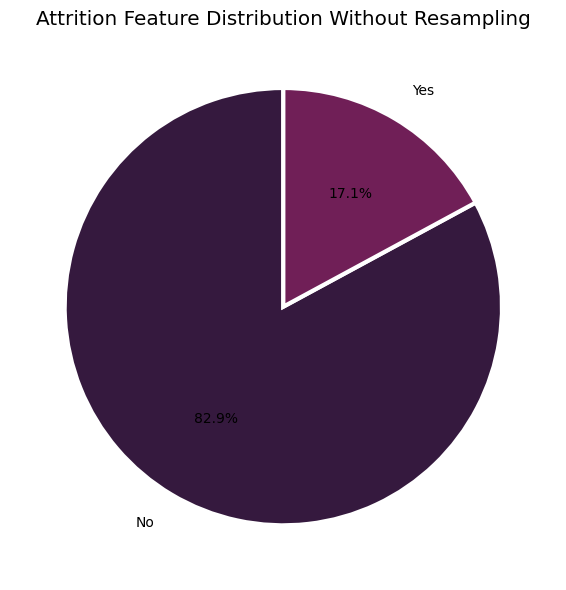

In [17]:
# Visualize data distribution without resampling
plt.figure(figsize=(6, 6))

# Create a pieplot
plt.pie(
    x=y_train.value_counts().values,
    labels=['No', 'Yes'],
    startangle=90,
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
plt.title('Attrition Feature Distribution Without Resampling')
plt.tight_layout()
plt.show()

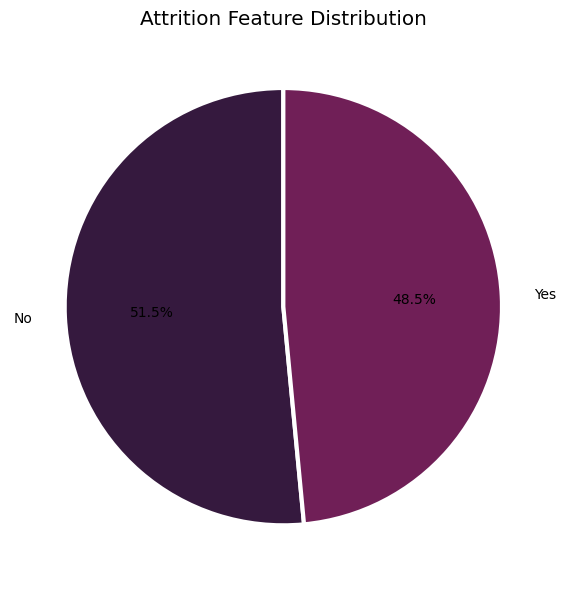

In [18]:
# Visualzie data distribution with resampling
plt.figure(figsize=(6, 6))

# Create a pieplot
plt.pie(
    x=y_resampled.value_counts().values,
    labels=['No', 'Yes'],
    startangle=90,
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
plt.title('Attrition Feature Distribution')
plt.tight_layout()
plt.show()

### 2. **Model Selection**
Selecting the models that we will be training and evaluating , to select the best suited model to make predictions based on the data within our dataset.

In [19]:
def modelPredict(
        model: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
                     XGBClassifier, SVC, AdaBoostClassifier],
        independent_var: Optional[pd.DataFrame]=X_train, 
        dependent_var: Optional[np.ndarray]=y_train,
        X_test: Optional[pd.DataFrame]=X_test,
) ->np.ndarray:
    """
    Trains a model and makes predictions.

    Parameters:
        - model: A machine learning model (either LogisticRegression or RandomForestClassifier).
        - X_train: Training feature data.
        - y_train: Training labels.
        - X_test: Test feature data for prediction.

    Returns:
        - y_pred: Predicted labels for the test data, to be compared to known test data.
    """
    # Fit the model with training data
    model.fit(independent_var, dependent_var)

    # Make predictions with the fitted model
    y_pred = model.predict(X_test)

    return y_pred


In [20]:
def crossValidation(
    model_name: str,
    model: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
            XGBClassifier, SVC, AdaBoostClassifier],
    independent_var: Optional[pd.DataFrame]=X_resampled, 
    dependent_var: Optional[np.ndarray]=y_resampled
    ):
    """
    Perform cross-validated predictions for a classification model.

    This function applies Stratified K-Folds cross-validation to the provided
    classification model and dataset, ensuring each fold has the same proportion
    of the classes. It uses `cross_val_predict` to generate predictions for each
    fold of the data.

    Parameters:
    -----------
    model : Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
                  XGBClassifier, SVC, AdaBoostClassifier]
        The classification model to be evaluated.
    
    independent_var : Optional[pd.DataFrame], default=X_resampled
        The feature matrix used for training. By default, it uses a resampled dataset.
    
    dependent_var : Optional[np.ndarray], default=y_resampled
        The target array containing class labels. By default, it uses the resampled target labels.

    Returns:
    --------
    y_pred : np.ndarray
        The array of cross-validated predictions.
    """
    # Stratified K-Folds to ensure each fold has the same proportion of the classes
    cv = StratifiedKFold(n_splits=5)

    # store cross-validated predictions
    y_train_pred = cross_val_predict(model, independent_var, dependent_var, cv=cv)

    # Evaluate model performance on the resampled training set
    print(f"Classification report for {model_name} (Resampled Training Set):")
    print(classification_report(dependent_var, y_train_pred))
    print('='*85)

    return y_train_pred


In [21]:
def modelEvaluation(y_predict: np.ndarray, y: np.ndarray) -> None:
    """
    Evaluates the performance of a classification model by outputing  a classification report.

    Args:
        y_predict :
            - The predicted labels output by the model.

    Returns:
        None
    """
    # Generate a classification report showing precision, recall, f1-score, and support
    class_report_log_reg = classification_report(y, y_predict)
    
    # Print the classification report
    print(class_report_log_reg)


#### 2.1 **Standard Model Selection**

In [22]:
# Instantiate the models to be used
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest Classification': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting Classification': GradientBoostingClassifier(random_state=42),
    'XGBoosting Classification': XGBClassifier(random_state=42),
    'Support Vector Classification': SVC(random_state=42, class_weight='balanced')
}

# Model predictions
model_predictions = {model_name: modelPredict(model) for model_name, model in models.items()}

#### 2.2 **Model Performance**

##### 2.2.1 **Imbalanced Data**

In [23]:
# Train the models using imbalanced data
imbalanced_models = {}
for model_name, model in models.items():
    imbalanced_model = model.fit(X_train, y_train)
    imbalanced_models.update({f'{model_name.replace(' ', '_')}_imbalanced': imbalanced_model})

imbalanced_models

{'Logistic_Regression_imbalanced': LogisticRegression(class_weight='balanced', random_state=42),
 'Random_Forest_Classification_imbalanced': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Gradient_Boosting_Classification_imbalanced': GradientBoostingClassifier(random_state=42),
 'XGBoosting_Classification_imbalanced': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_s

In [24]:
# Use imbalanced model to make a prediction 
y_predict_imbalanced = {}
for model_name, model in imbalanced_models.items():
    y_prediction_imbalance = model.predict(X_train)
    y_predict_imbalanced.update({f'{model_name.replace(' ', '_')}': y_prediction_imbalance})

##### 2.2.2 **Resampled Data**

In [25]:
# Train the models using resampled data 
resampled_models = {}
for model_name, model in models.items():
    resampled_model = model.fit(X_resampled, y_resampled)
    resampled_models.update({f'{model_name.replace(' ', '_')}': resampled_model})

resampled_models

{'Logistic_Regression': LogisticRegression(class_weight='balanced', random_state=42),
 'Random_Forest_Classification': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Gradient_Boosting_Classification': GradientBoostingClassifier(random_state=42),
 'XGBoosting_Classification': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None

##### 2.2.3 **Resampled Model Performance**

In [26]:
# Stratified K-Fold to ensure each fold has the same proportion of classes
cv = StratifiedKFold(n_splits=5)

# Use cross validation to make predictions on the resampled data. 
y_predict_resampled_cv = {}
for model_name, model in resampled_models.items():
    y_resampled_pred_cv = crossValidation(model_name, model, X_resampled, y_resampled)
    y_predict_resampled_cv.update({f'y_predict_{model_name.replace(' ', '_')}_cv': y_resampled_pred_cv})

Classification report for Logistic_Regression (Resampled Training Set):
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       853
         1.0       0.78      0.82      0.80       803

    accuracy                           0.80      1656
   macro avg       0.80      0.80      0.80      1656
weighted avg       0.80      0.80      0.80      1656

Classification report for Random_Forest_Classification (Resampled Training Set):
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       853
         1.0       0.96      0.87      0.92       803

    accuracy                           0.92      1656
   macro avg       0.93      0.92      0.92      1656
weighted avg       0.93      0.92      0.92      1656

Classification report for Gradient_Boosting_Classification (Resampled Training Set):
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       853

##### 2.2.4 **Imbalanced Model Performance**

In [27]:
# Iterate through the dictionary items for model_predictions and return the performance of each model
for model_name, prediction in y_predict_imbalanced.items():
        print(f'Classification report for {model_name} (Train Set):')
        modelEvaluation(prediction, y_train)
        print('='*85)
        print()

Classification report for Logistic_Regression_imbalanced (Train Set):
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87       853
         1.0       0.46      0.82      0.59       176

    accuracy                           0.81      1029
   macro avg       0.71      0.81      0.73      1029
weighted avg       0.87      0.81      0.82      1029


Classification report for Random_Forest_Classification_imbalanced (Train Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       853
         1.0       1.00      1.00      1.00       176

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029


Classification report for Gradient_Boosting_Classification_imbalanced (Train Set):
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       853
   

#### 2.3 **Model Evaluation**

In [28]:
resampled_models

{'Logistic_Regression': LogisticRegression(class_weight='balanced', random_state=42),
 'Random_Forest_Classification': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Gradient_Boosting_Classification': GradientBoostingClassifier(random_state=42),
 'XGBoosting_Classification': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None

In [29]:
# Combine the imbalanced trained models and the resample trained models. 
imbalanced_models.update(resampled_models)

In [30]:
all_predictions = {model_name: model.predict(X_test) for model_name, model in imbalanced_models.items()}
for key, prediction in all_predictions.items():
    print(f'Classification report for {key} (Test Set):')
    print(classification_report(y_test, prediction))
    print('='*85)
    print()

Classification report for Logistic_Regression_imbalanced (Test Set):
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85       380
         1.0       0.32      0.64      0.43        61

    accuracy                           0.76       441
   macro avg       0.63      0.71      0.64       441
weighted avg       0.85      0.76      0.79       441


Classification report for Random_Forest_Classification_imbalanced (Test Set):
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       380
         1.0       0.61      0.18      0.28        61

    accuracy                           0.87       441
   macro avg       0.75      0.58      0.60       441
weighted avg       0.84      0.87      0.84       441


Classification report for Gradient_Boosting_Classification_imbalanced (Test Set):
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       380
      

## **Conclusion**
___

**Analysis**:
* Models like **Gradient Boosting** and **XGBoost** have a more balanced performance, showing higher F1-scores for class 1.
* Random Forest struggles with recall for the minority class (1), despite good precision, leading to low F1-scores.
* Logistic Regression has moderate recall but very low precision for class 1, which affects its F1-score.

These results indicate that while models perform well on the majority class (0), improving recall and precision for the minority class (1) remains challenging. Further tuning or alternative resampling techniques may help balance performance.

**Summary**:
* Depending on the skewness, distribution and the hypothesis test of the Shapiro-Wilk test, we determined which features would require robust scaling using **RobustScaler**, or normalization using **MinMaxScaling**. No feature displayed a gaussian distribution and therefore standardisation was not performed on any of the features. 
* Model performance on imbalanced dataset and resampled dataset using oversampling with the **ADASYN** class to handle the imbalance oof the dataset.
* **Cross validation** on the resampled dataset was applied to models trained with the resampled data. The performance of the models from the imbalanced datasets and the resampled datasets were however not too dissimilar, suggesting furthing tuning could be required, or using alternative resampling techniques. 
* In total, 5 models were trained, namely; **Support Vector Classification** model, **Logistic Regression** model, **Gradient Boosted Classifier** model, **XGBoost Classifier**, and finally, a **Random Forest Classifier**. 